In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Fourth combination/preprocessed3.csv')


## Model adjustment

In [3]:
X = df.drop('price', axis =1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)


### Decision tree

In [4]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 12.9 µs


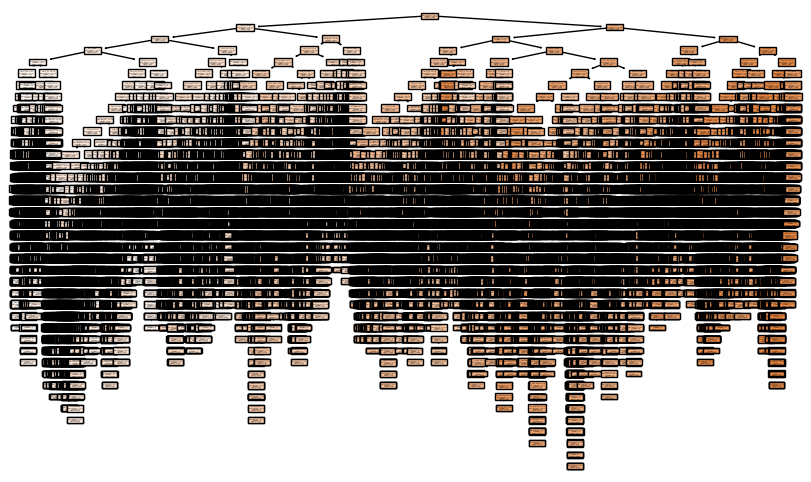

In [5]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [6]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.0

In [7]:
print(regressor.tree_.max_depth)

39


In [8]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [9]:
y_pred_test_dt

array([8.847, 6.822, 6.809, ..., 7.121, 6.978, 7.752])

In [10]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [11]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.024332e-01,2.078511e-02,1.441704e-01,0.979647,test,Decission Tree I
1,9.797296e-18,9.432986e-33,9.712356e-17,1.000000,train,Decission Tree I


In [12]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [13]:
%time
gs.fit(X_train, y_train)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 26.9 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.021, test=-1.026) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.016, test=-1.019) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.985, test=-0.980) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.345, test=-0.350) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.713, test=-0.715) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.007, test=-1.021) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.542, test=-0.552) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 9/10] END max_depth=4, max_features=3, min_samples_split=10;, score=(train=-0.476, test=-0.458) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=10;, score=(train=-1.011, test=-1.016) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.282, test=-0.279) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.974, test=-0.986) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.740, test=-0.737) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.179, test=-0.181) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.468, test=-0.446) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.249, test=-0.257) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_

[CV 1/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.156, test=-0.150) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.239, test=-0.231) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.179, test=-0.185) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.147, test=-0.145) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.093, test=-0.093) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.134, test=-0.131) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.732, test=-0.741) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.117, test=-0.117) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=

[CV 4/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.977, test=-0.995) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.600, test=-0.609) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.375, test=-0.391) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.986, test=-0.993) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.871, test=-0.861) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.343, test=-0.350) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.199, test=-0.197) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.250, test=-0.253) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_

[CV 8/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.639, test=-0.651) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.799, test=-0.794) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.687, test=-0.700) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.345, test=-0.337) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.169, test=-0.166) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.255, test=-0.266) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.159, test=-0.162) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.193, test=-0.192) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4,

[CV 7/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.152, test=-0.161) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.494, test=-0.499) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.114, test=-0.111) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.287, test=-0.282) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.940, test=-0.948) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.240, test=-0.235) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.548, test=-0.552) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.907, test=-0.923) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, 

[CV 2/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.136, test=-0.132) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.109, test=-0.114) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.459, test=-0.483) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.468, test=-0.477) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.251, test=-0.254) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.424, test=-0.446) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.153, test=-0.153) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.385, test=-0.369) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_

[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.590, test=-0.588) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.680, test=-0.687) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.255, test=-0.269) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.217, test=-0.221) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.141, test=-0.137) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.616, test=-0.607) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.125, test=-0.125) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.120, test=-0.122) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6

[CV 2/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.433, test=-0.441) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.243, test=-0.252) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.413, test=-0.441) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.487, test=-0.504) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.848, test=-0.859) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.810, test=-0.840) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.601, test=-0.591) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.232, test=-0.234) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_

[CV 5/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.111, test=-0.111) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.157, test=-0.164) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.203, test=-0.213) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.398, test=-0.384) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.269, test=-0.257) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.553, test=-0.543) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.201, test=-0.212) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.468, test=-0.462) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [14]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

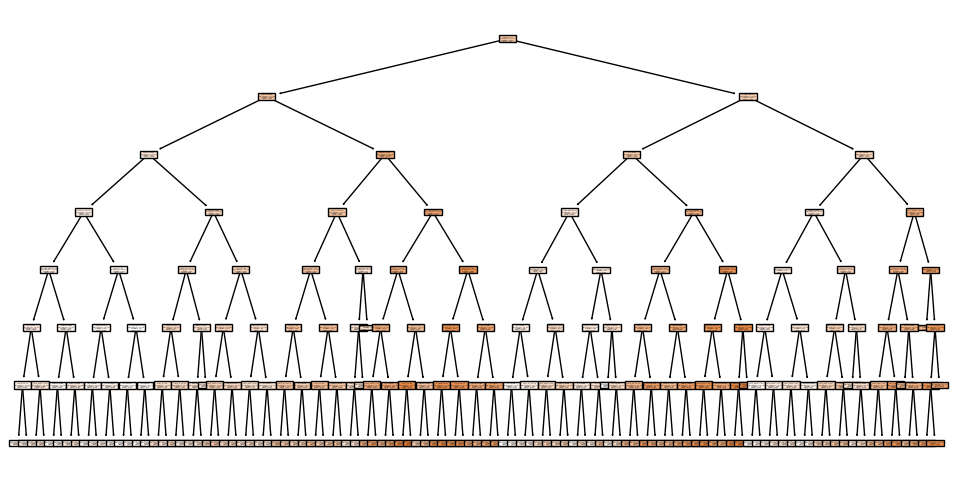

In [15]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


### Prediction

In [16]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [17]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [18]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.204259,0.069497,0.263622,0.931950,test,Decision tree II
1,0.203267,0.069241,0.263137,0.933232,train,Decision tree II


## Test

In [19]:
df1 = pd.read_csv("/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Fourth combination/reality3.csv", index_col = 0)


In [20]:
X_reality_submision = best_tree.predict(df1)
X_reality_submision

array([6.1501236 , 8.50371354, 9.37341721, ..., 6.55186217, 8.50371354,
       8.50371354])

In [21]:
submision1 = pd.DataFrame(X_reality_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.150124
1,1,8.503714
2,2,9.373417
3,3,7.695667
4,4,9.277181
...,...,...
13480,13480,8.503714
13481,13481,8.503714
13482,13482,6.551862
13483,13483,8.503714


In [22]:
submision1.to_csv("submission3_david3.csv", index=False)